<a href="https://colab.research.google.com/github/RJuro/AS2021/blob/main/Stat_2020_reeksamen_opgave_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Anvendt Statisik - Re-eksamen 
### HA E2020

I denne opgave bliver i introduceret for Amerikanske huspriser, baseret på opslag fra den private salgsdatabase Craigslist

![](https://source.unsplash.com/C0OhW5_W6hw)

Notebook'en guider dig igennem opgaven. Priser fortolkes i amerikanske dollars ($). 

Dataset er baseret på datasæt fra http://kaggle.com/
uploadet i 2019.

In [ ]:
# Importer de pakker der skal bruges til at besvare opgaven her
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x) # slukker for "scientific notation"

import seaborn as sns
sns.set()

data findes på digital eksamen - kan også hentes med link fra Github: https://github.com/SDS-AAU/IntroStat/raw/master/Data/housing_cleaned.csv

**Hvis der kommer fejl. Og du kommer ikke videre f.eks in DF er ubrugelig** Lad være med at gå i panik! Gem din notebook, (måske) genstart kernel, kør cellerne oppefra ned (I Colab: automatisk med "Runtime" --> "Run before"; Jupyter Lab "Run" --> "Run all above selected cell")

Besvarelser (tekst) skrives i felter med "Svar: ..." ikke som kommentar i kode-celler

**1**

In [ ]:
# Indlæs data (housing_cleaned.csv)
df = pd.read_csv('https://github.com/SDS-AAU/IntroStat/raw/master/Data/crime_per_city.csv')

In [ ]:
# vis de første fem rækker af data
df.head()

,Unnamed: 0,State,City,Population,Violent Crime,Murder,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny-Theft,Motor Vehicle Theft,Arson,state_abbr
0,0,New Mexico,Albuquerque,558874,883,5.40000,71.90000,247.10000,558.40000,5446.10000,1095.60000,3713.90000,636.60000,15.40000,nm
1,1,California,Anaheim,346956,317,4.00000,22.80000,120.50000,170.10000,2362.30000,375.00000,1619.80000,367.50000,6.60000,ca
2,2,Alaska,Anchorage,301306,865,4.00000,130.10000,164.60000,565.90000,3827.00000,456.30000,3059.00000,311.60000,26.90000,ak
3,3,Texas,Arlington,382976,484,3.40000,53.80000,128.70000,298.20000,3515.10000,644.90000,2633.60000,236.60000,6.80000,tx
4,4,Georgia,Atlanta,454363,1227,20.50000,33.20000,512.60000,661.10000,5747.40000,1203.90000,3631.00000,912.50000,16.50000,ga


In [ ]:
# vis information om variable og observationer i data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               25000 non-null  int64  
 1   region                   25000 non-null  object 
 2   price                    25000 non-null  int64  
 3   type                     25000 non-null  object 
 4   sqfeet                   25000 non-null  int64  
 5   beds                     25000 non-null  int64  
 6   baths                    25000 non-null  float64
 7   cats_allowed             25000 non-null  int64  
 8   dogs_allowed             25000 non-null  int64  
 9   smoking_allowed          25000 non-null  int64  
 10  wheelchair_access        25000 non-null  int64  
 11  electric_vehicle_charge  25000 non-null  int64  
 12  comes_furnished          25000 non-null  int64  
 13  laundry_options          19886 non-null  object 
 14  parking_options       

**2**

In [ ]:
# giv et overblik over, hvor mange missing der er i hver variabel (med funktion, ikke udledt fra ovenstående)
df.isnull().sum()

Unnamed: 0                    0
region                        0
price                         0
type                          0
sqfeet                        0
beds                          0
baths                         0
cats_allowed                  0
dogs_allowed                  0
smoking_allowed               0
wheelchair_access             0
electric_vehicle_charge       0
comes_furnished               0
laundry_options            5114
parking_options            9098
state                         0
dtype: int64

**3**

In [ ]:
# give et overblik over prisfordeling (min, max, median, std.afvigelse - 1 Pandas funktion) 
df.price.describe()

count      25000.00000
mean        1764.99220
std        65978.99022
min            0.00000
25%          801.00000
50%         1029.00000
75%         1399.00000
max     10321189.00000
Name: price, dtype: float64

**4**

In [ ]:
# find den række med det dyreste hus/lejlighed. Det er nemmest ved at 
# Ud fra de informationer du har samlet indtil videre: Er det en sansynlig pris eller en fejl (f.eks. dataindsampling, stavefejl)?

df.loc[df['price'] == 10321189]

,Unnamed: 0,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
19132,15023,visalia-tulare,10321189,apartment,729,3,2.00000,0,0,0,0,0,0,laundry on site,carport,ca


Svar: ...

**5**

In [ ]:
# Med udgangspunkt i "price", beskær datasættet til 99. percentil (99 ekskl.) - brug dette datasæt fremadrettet!!!
df = df[df.price < df.price.quantile(.99)]

**6**

In [ ]:
# give et overblik over prisfordeling (min, max, median, std.afvigelse) i det afgrænsede datasæt for at sikre
# at ekstremværdier er ude

# Hvor mange observationer blev slettet fra dine data?

df.price.describe()

count   23750.00000
mean     1084.33629
std       398.74171
min         0.00000
25%       799.00000
50%      1000.00000
75%      1330.00000
max      2254.00000
Name: price, dtype: float64

Svar: ...

**7**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


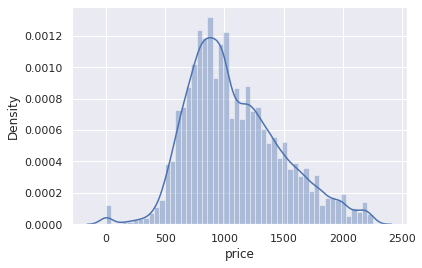

In [ ]:
# Lav et histogram over prisfordelingen og redegør kort for hvad der kan aflæses.

sns.distplot(df.price)

Svar: ...

**8**

In [ ]:
# Hvor mange forskellige typer udlejningsboliger findes der i data, og hvor mange observationer er der af hver? (brug variablen "type")
df['type'].value_counts() 

apartment          19772
house               1959
townhouse            984
condo                335
duplex               308
manufactured         266
cottage/cabin         60
loft                  35
flat                  22
in-law                 8
assisted living        1
Name: type, dtype: int64

9

In [ ]:
# Vis median for "price" grupperet på "type" 
# Hvilken type er det dyreste?  
df.groupby('type').price.median().sort_values(ascending=False)

type
flat              1287.50000
condo             1265.00000
loft              1185.00000
house             1099.00000
townhouse         1053.00000
cottage/cabin     1025.00000
duplex            1000.00000
apartment          999.00000
in-law             995.00000
manufactured       899.00000
assisted living    175.00000
Name: price, dtype: float64

Svar: ...

10

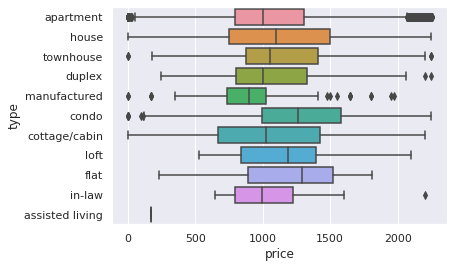

In [ ]:
# lav et boxplot over den gennemsnitlige "price" fordelt på type
# Fortolk og samenlign "appartment" vs "house" ud fra boxplot for de 2 kategorier

sns.boxplot(data = df, x = "price", y = "type")

Svar: ...

11

In [ ]:
# Filtrer igen datasættet, denne gang med udgangspunkt  i de 5 mest udbredte boligtyper (apartment, house, townhouse, condo, duplex)
# brug dette datasæt fremadrettet!!!
df = df[df['type'].isin(['apartment', 'house', 'townhouse', 'condo', 'duplex'])]

12

In [ ]:
# Undersøg om boligerne er dyrere eller billigere hvis hunde er tilladt. 
# Brug krydstabulering på tværs af ovenstående filtrering, og aggreger median 
pd.crosstab(df['type'], df['dogs_allowed'], values=df['price'], aggfunc='median')

dogs_allowed,0,1
type,,
apartment,975,1002
condo,1300,1213
duplex,995,1125
house,1100,1050
townhouse,1275,1032


In [ ]:
#Undersøg ligeledes prisforskel ift. om katte er tilladte?
pd.crosstab(df['type'], df.cats_allowed, values=df.price, aggfunc='median')

cats_allowed,0,1
type,,
apartment,974,1000
condo,1350,1209
duplex,1000,1050
house,1150,1025
townhouse,1250,1032


13

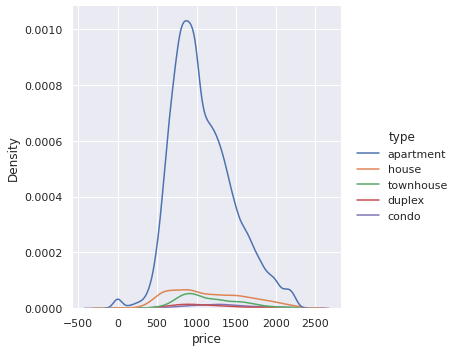

In [ ]:
# Lav en "kernel density estimation" (kde) plot
# hvor der vises en farve-opdeling på forskellige "type"
# brug her seaborn's displot funktionen https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot

sns.displot(data = df, x='price', hue='type', kind='kde')

14

In [ ]:
# Vis og forklar den prismæssige standardafvigelse for "type" - hvordan passer det sammen med  hvad der kan ses i boxplot og KDE?
# Note: Sæt degrees of freedom til 0 (ddof=0)
df.groupby('type').price.std(ddof=0) 

type
apartment   304.96060
condo       339.80135
duplex      296.03307
house       356.98044
townhouse   291.14254
Name: price, dtype: float64

Svar: ...

15

In [ ]:
# giv et overblik over hvor mange observationer der er i hver stat ('state')
df.state.value_counts()

fl    1802
tx    1774
nc    1132
ca     988
ga     903
mi     860
oh     829
va     704
tn     675
sc     569
pa     568
il     559
al     553
co     530
ny     522
ks     519
ia     506
or     449
la     432
mn     427
az     392
in     380
md     376
ok     367
wi     367
ky     342
wa     330
ms     302
ut     298
id     282
nd     246
ct     210
nj     199
ar     183
nm     173
ma     163
ne     162
nv     143
sd     126
mo     125
ak     120
de     108
mt      90
ri      67
dc      65
nh      52
wv      44
hi      32
vt      23
me      21
wy      13
Name: state, dtype: int64

16

In [ ]:
# Generer et datasæt "df_florida", hvor der kun er observationer fra staten florida ('fl')
df_florida = df.loc[df['state'] == 'fl']

In [ ]:
# Tjek hvor mange regioner der er i Florida, samt hvor mange observationer der er i hver
df_florida.region.value_counts()

jacksonville             175
space coast              160
sarasota-bradenton       156
orlando                  153
daytona beach            143
tallahassee              133
tampa bay area           128
lakeland                 127
ft myers / SW florida    121
panama city               99
gainesville               92
pensacola                 87
treasure coast            84
okaloosa / walton         57
south florida             33
ocala                     29
heartland florida         11
st augustine               9
florida keys               5
Name: region, dtype: int64

17

In [ ]:
# Lav en oversigt over gennemsnitsprisen for hver region i Florida, og sorter fra højeste til laveste pris 
df_florida.groupby('region').price.mean().sort_values(ascending=False)

region
south florida           1449.66667
treasure coast          1306.14286
sarasota-bradenton      1250.82051
okaloosa / walton       1250.73684
orlando                 1229.28758
panama city             1189.33333
ft myers / SW florida   1174.15702
tampa bay area          1146.49219
st augustine            1136.00000
space coast             1129.64375
florida keys            1076.00000
jacksonville            1056.61714
lakeland                1042.75591
daytona beach           1038.53147
gainesville             1016.44565
heartland florida        989.81818
tallahassee              972.16541
pensacola                951.33333
ocala                    886.96552
Name: price, dtype: float64

18

In [ ]:
#Find ud af om prisen korrelerer med boligstørrelsen ('sqfeet') for hele datasættet df_florida 
df_florida.price.corr(df_florida.sqfeet)

0.1366327317051715

19

In [ ]:
# lav et afgrænset datasæt "df_jv", med observationer fra regionen Jacksonville, Florida 
df_jv = df.loc[(df['region'] == 'jacksonville') & (df['state'] == 'fl')]

20

In [ ]:
#Tjek korrelationen mellem pris og boligstørrelse i Jacksonville, Florida
# Forklar/fortolk forskellen i de to korrelationsberegninger (Florida vs Jacksonville)

df_jv.price.corr(df_jv.sqfeet)

0.6062333857717063

Svar: ...

21

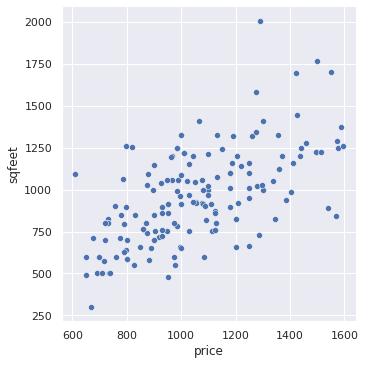

In [ ]:
# visualiser, ved hjælp af et scatterplot (seaborn relplot), sammenhængen mellem "price" og "sqfeet" i Jacksonville, Florida
sns.relplot(x="price", y="sqfeet", data=df_jv)

Den følgende del ser på priser og kriminalitet. Her bruger vi et datasæt med kriminalitetsstatistik fra US storbyer. Disse data skal aggregeres med huspris-datasættet på delstatsniveau. Derafter fortager vi korrelationsberegninger for at se, om prisniveauet korrelerer med kriminalitet.

Data kan indlæses fra github: https://github.com/SDS-AAU/IntroStat/raw/master/Data/crime_per_city.csv

22

In [ ]:
# Indlæs data crime_per_city.csv
crime = pd.read_csv('crime_per_city.csv')

23

In [ ]:
# beregn gennemsnitsværdier for 'Burglary','Violent Crime' på delstatsniveau ('state_abbr') som ny DataFrame crime_state
# 'state_abbr' bliver index i denne DataFrame
crime_state = crime.groupby('state_abbr')['Burglary','Violent Crime'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


24

In [ ]:
# Generér et merget datasæt "price_n_crime" ud fra "df" og "crime_state".
# aggreger huspriser og data om gennemsnitlig kriminalitet på delstatsstatsniveau (brug left_on='state', right_index = True som nøgle)
price_n_crime = pd.merge(df, crime_state, left_on='state', right_index= True)

25

In [ ]:
# brug price_n_crime DataFrame: beregn og fortolk korrelation for priser vs gennemsnitlige niveauer for indbrudstyveri (burglary)
price_n_crime.price.corr(price_n_crime['Burglary'])

-0.22295521168952775

Svar: ...